# Week 2.2

## Tree Classification

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [8]:
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")

In [11]:
# Display the first few rows of the training dataset
print(train_data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [12]:

# Summary statistics of the training dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


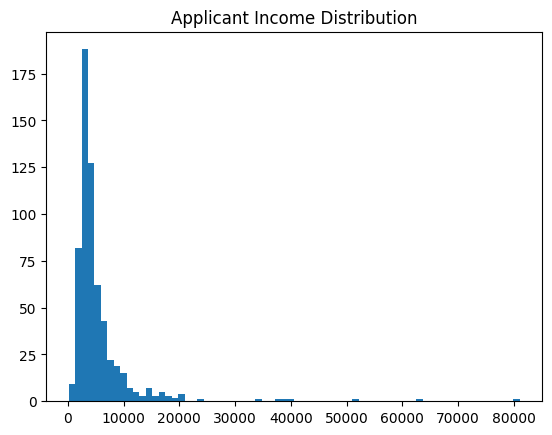

In [13]:
train_data['ApplicantIncome'].hist(bins=70, grid=False)
plt.title('Applicant Income Distribution')
plt.show()

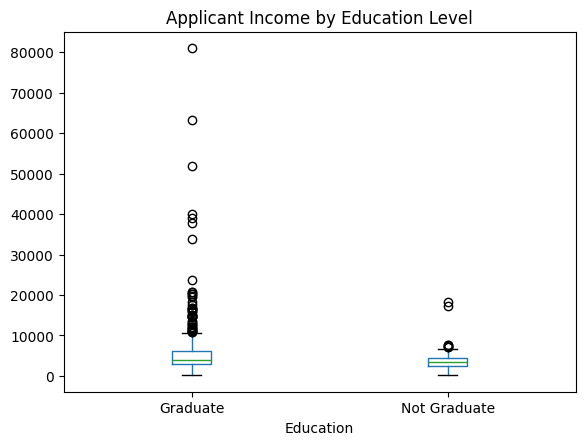

In [14]:
train_data.boxplot(column='ApplicantIncome', grid=False, by='Education')
plt.title('Applicant Income by Education Level')
plt.suptitle('')
plt.show()

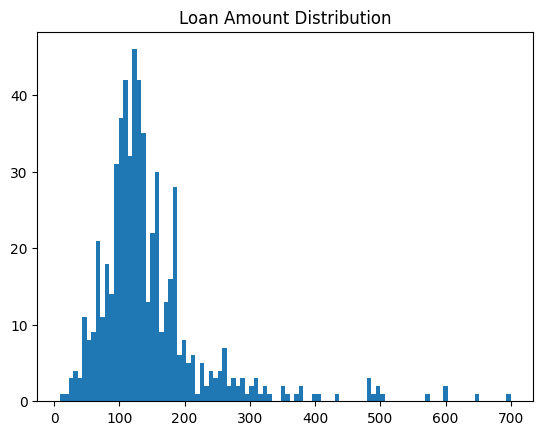

In [15]:
train_data['LoanAmount'].hist(bins=100, grid=False)
plt.title('Loan Amount Distribution')
plt.show()

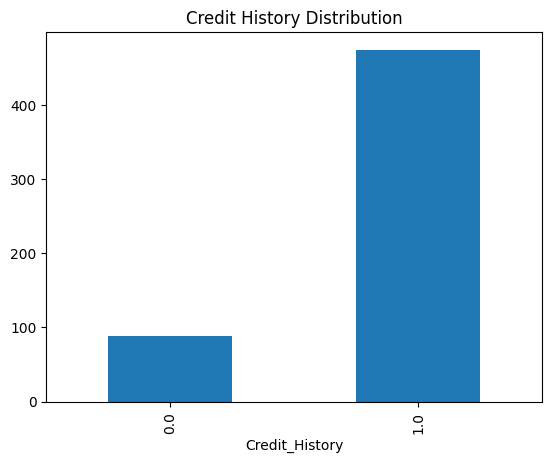

In [16]:
# Categorical value analysis
temp = train_data['Credit_History'].value_counts(ascending=True)
temp.plot(kind='bar')
plt.title('Credit History Distribution')
plt.show()

In [18]:
# Data munging
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Self_Employed'].fillna('No', inplace=True)
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_9656\2551091862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_9656\2551091862.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [20]:
# Encoding categorical variables
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])

# Display the first few rows of the processed training dataset
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Training Accuracy: 0.7886178861788617


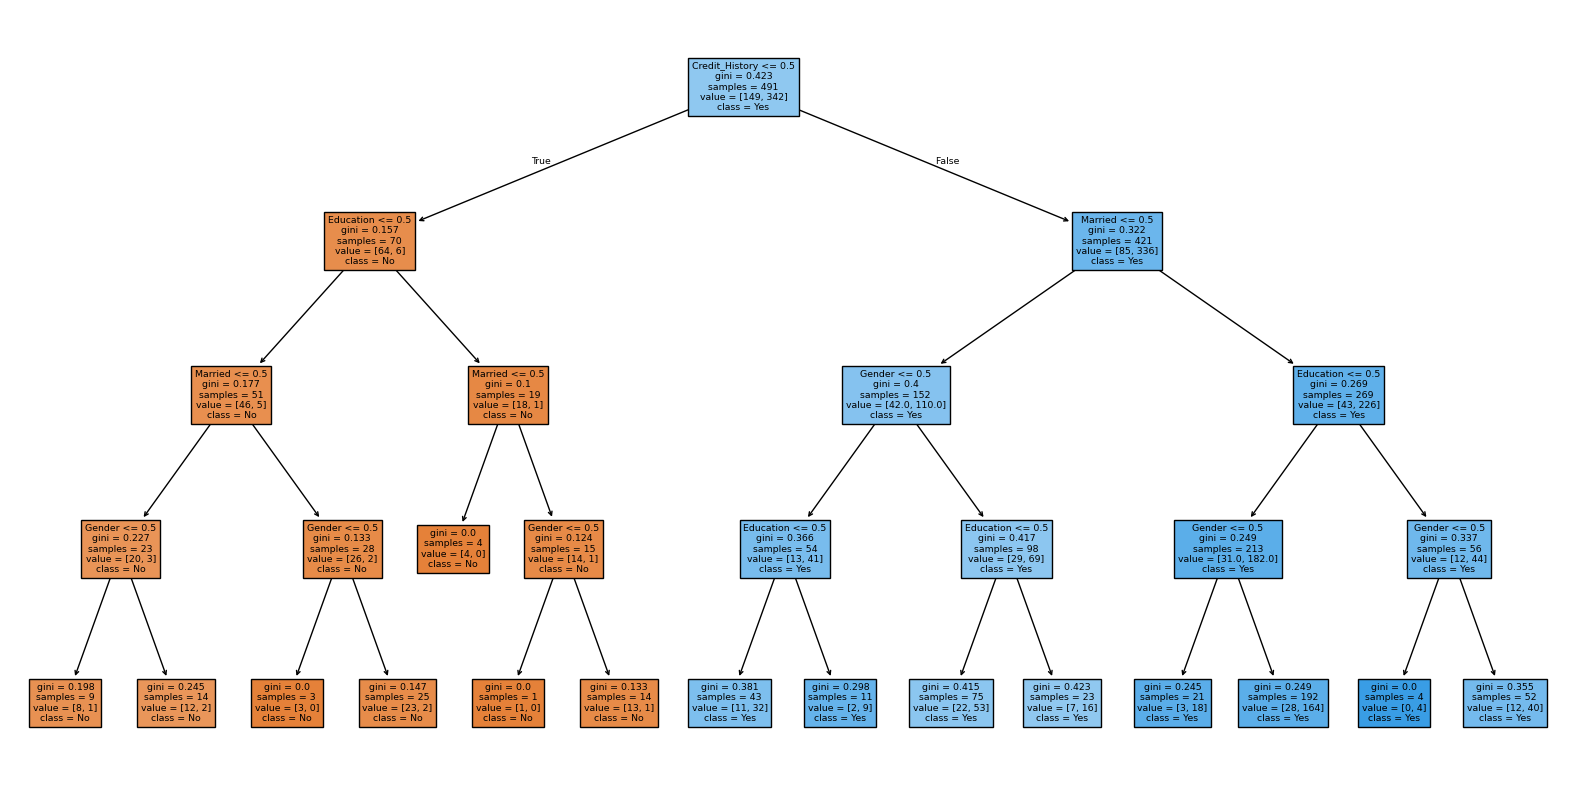

In [22]:
X_train = train_data[['Credit_History', 'Gender', 'Married', 'Education']]
y_train = train_data['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation dataset
predictions = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"Training Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

## Random Forest

In [25]:
#  Load the training dataset
train_data = pd.read_csv("./Data/train.csv")

# Data preprocessing (as described previously)

# Define features and target variable
X_train = train_data[['Credit_History', 'Gender', 'Married', 'Education']]
y_train = train_data['Loan_Status']

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation dataset (if split is used)
predictions_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_val, predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# For the test dataset
X_test = test_data[['Credit_History', 'Gender', 'Married', 'Education']]
test_predictions_rf = rf_model.predict(X_test)

# Output the predictions
print(test_predictions_rf)

ValueError: could not convert string to float: 'Male'